In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

import os
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

country_profiles_file = "country_profile_variables.csv"

In [400]:
country_data = pd.read_csv(country_profiles_file)
country_data.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [401]:

country_region_gdp_df = country_data.loc[:, ['country', 'Region','GDP: Gross domestic product (million current US$)']]

country_region_gdp_df



,country,Region,GDP: Gross domestic product (million current US$)
0,Afghanistan,SouthernAsia,20270
1,Albania,SouthernEurope,11541
2,Algeria,NorthernAfrica,164779
3,American Samoa,Polynesia,-99
4,Andorra,SouthernEurope,2812
5,Angola,MiddleAfrica,117955
6,Anguilla,Caribbean,320
7,Antigua and Barbuda,Caribbean,1356
8,Argentina,SouthAmerica,632343
9,Armenia,WesternAsia,10529


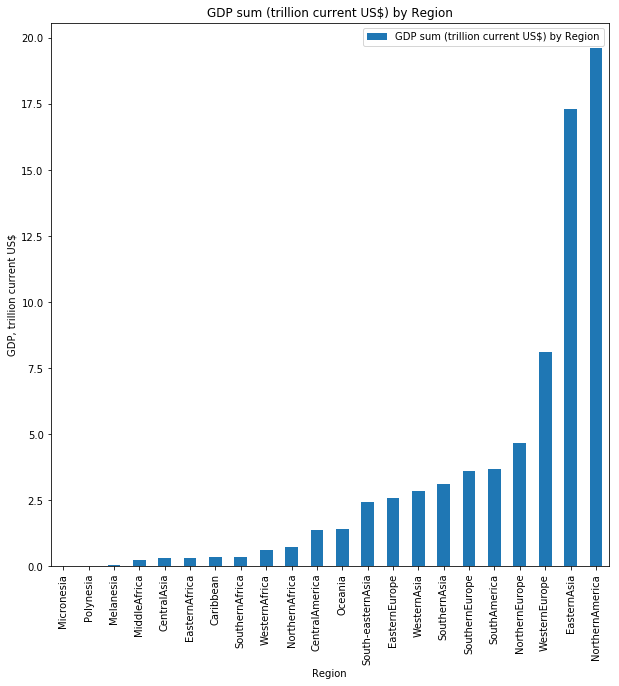

In [402]:

# change values to numeric
country_region_gdp_df.loc[:,'GDP: Gross domestic product (million current US$)'] = pd.to_numeric(country_region_gdp_df.loc[:,'GDP: Gross domestic product (million current US$)'], downcast='integer')
country_region_gdp_df['GDP: Gross domestic product (million current US$)'].dtypes

country_region_gdp_df

#remove the -99 values
country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['GDP: Gross domestic product (million current US$)'] != -99]

country_region_gdp_df

# group by sum of region clumn, and sort the values
region_gdp = country_region_gdp_df.groupby('Region').sum()
region_gdp = region_gdp.sort_values("GDP: Gross domestic product (million current US$)")

# divide values by a number to present a cleaner x axis
region_gdp["GDP: Gross domestic product (million current US$)"] = region_gdp["GDP: Gross domestic product (million current US$)"] / 1000000

# plot bar chart
plot = region_gdp.plot(kind="bar", figsize=(10,10))

# format labels
plt.legend(['GDP sum (trillion current US$) by Region'])
plt.title("GDP sum (trillion current US$) by Region")
plot.set_xlabel("Region")
plot.set_ylabel("GDP, trillion current US$")

plt.savefig("/Users/marlonschieber/Desktop/gdp.png", bbox_inches='tight')

plt.show()


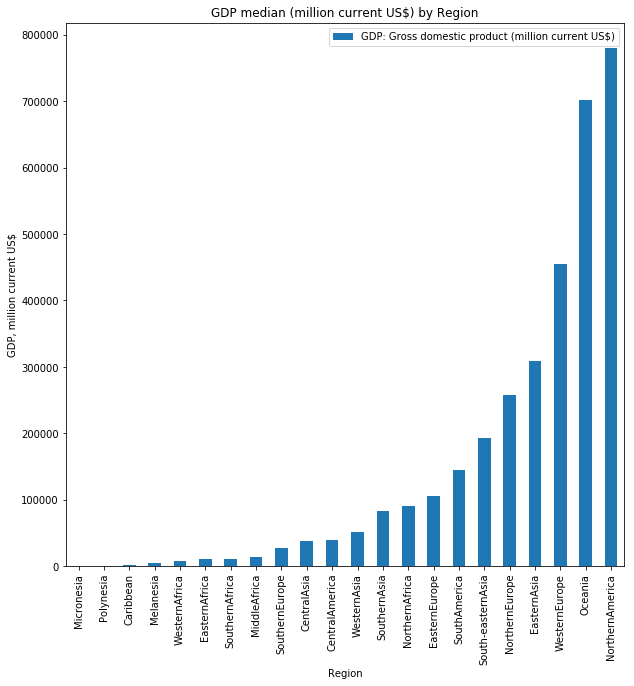

<Figure size 432x288 with 0 Axes>

In [403]:

country_region_gdp_df

region_gdp = country_region_gdp_df.groupby('Region').median()
region_gdp = region_gdp.sort_values("GDP: Gross domestic product (million current US$)")


plot = region_gdp.plot(kind="bar", figsize=(10,10))


plt.title("GDP median (million current US$) by Region")
plot.set_xlabel("Region")
plot.set_ylabel("GDP, million current US$")


plt.show()
plt.tight_layout()


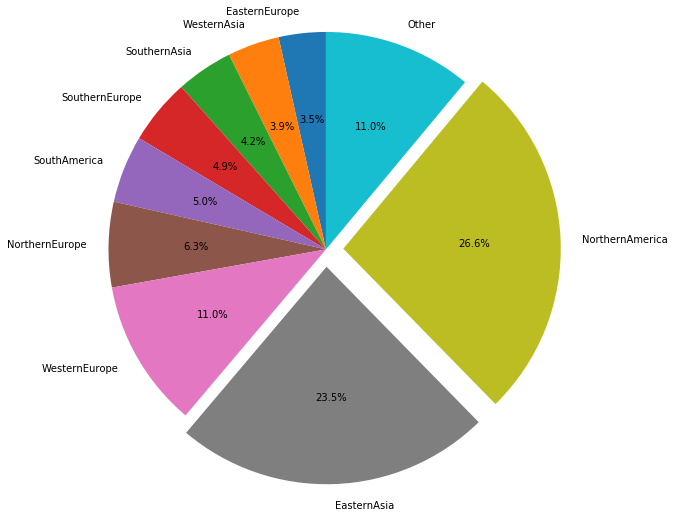

In [404]:
# load df
country_region_gdp_df

# group by region, aggregate the sum, and sort values
region_gdp_total = country_region_gdp_df.groupby('Region').sum()
region_gdp_total = region_gdp_total.sort_values("GDP: Gross domestic product (million current US$)")

# sum of total GDP
sum_all_gdp = region_gdp_total.sum()
# grab the sum value of total GDP from the series and assign to variable
sum_all_gdp = sum_all_gdp.iloc[0]

# take the sum of the top ten regions
top_gdp_regions_sum = region_gdp_total.iloc[13:,0].sum()
# subtract the sum from the top ten regions from the sum total of all regions, 
# this equals the sum of all other regioans 
other_sum = sum_all_gdp - top_gdp_regions_sum

# create lists to hold names of regions and values of those regions
region_labels_list = region_gdp_total.index.values[13:].tolist()
region_gdp_list =  region_gdp_total.iloc[13:,0].tolist()

# append the sum and label for other into the lists above
region_gdp_list.append(other_sum) 
region_labels_list.append("Other")

# create pie chart
plt.axis('equal')
explode = [0,0,0,0,0,0,0,0.2,0.2,0]

plt.pie(region_gdp_list, labels=region_labels_list, explode = explode ,radius=2.5,
        autopct="%1.1f%%", startangle=90)

# save fig to a path of choice, in this case the desktop of my computer
plt.savefig("/Users/marlonschieber/Desktop/gdp_piechart.png", bbox_inches='tight')

plt.show()





In [405]:
country_region_gdp_df1 = country_region_gdp_df[country_region_gdp_df['Region'] =='WesternEurope'] 
country_region_gdp_df1 = country_region_gdp_df1.sort_values(['GDP: Gross domestic product (million current US$)'])

# country_region_gdp_df1["GDP: Gross domestic product (million current US$)"] = region_gdp["GDP: Gross domestic product (million current US$)"].map("{:.2f}".format)
country_region_gdp_df1["GDP: Gross domestic product (million current US$)"] = country_region_gdp_df1["GDP: Gross domestic product (million current US$)"].map("{:,}".format)

country_region_gdp_df1




,country,Region,GDP: Gross domestic product (million current US$)
133,Monaco,WesternEurope,"6,258"
117,Liechtenstein,WesternEurope,"6,361"
119,Luxembourg,WesternEurope,"56,802"
12,Austria,WesternEurope,"376,967"
19,Belgium,WesternEurope,"455,107"
197,Switzerland,WesternEurope,"670,790"
143,Netherlands,WesternEurope,"750,318"
72,France,WesternEurope,"2,418,946"
78,Germany,WesternEurope,"3,363,600"


In [406]:
country_region_gdp_df = country_data.loc[:, ['country', 'Region','GDP growth rate (annual %, const. 2005 prices)']]

country_region_gdp_df.iloc[162]


country                                           Puerto Rico
Region                                              Caribbean
GDP growth rate (annual %, const. 2005 prices)          -~0.0
Name: 162, dtype: object

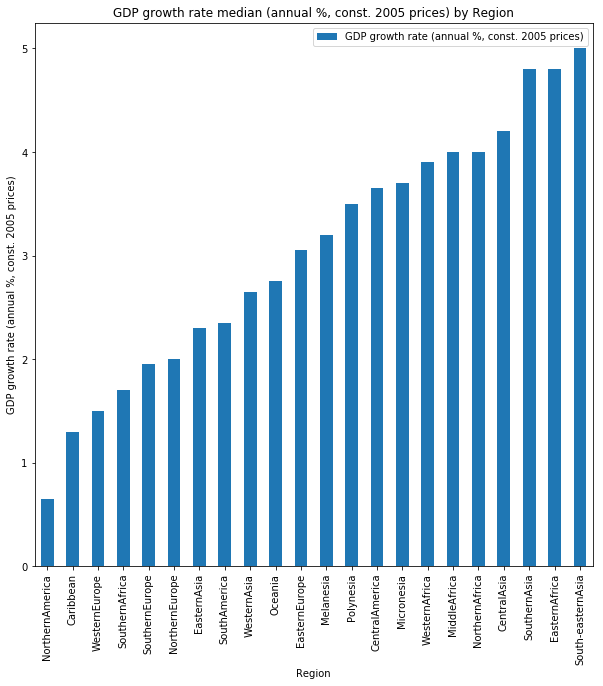

<Figure size 432x288 with 0 Axes>

In [407]:
country_region_gdp_df

#remove Puerto Rico due to weird non-numeric data value in column GDP growth 
country_region_gdp_df = country_region_gdp_df.drop([162])

country_region_gdp_df.loc[:,'GDP growth rate (annual %, const. 2005 prices)'] = pd.to_numeric(country_region_gdp_df.loc[:,'GDP growth rate (annual %, const. 2005 prices)'], downcast='float')

country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['GDP growth rate (annual %, const. 2005 prices)'] != -99]

country_region_gdp_df


region_gdp = country_region_gdp_df.groupby('Region').median()
region_gdp = region_gdp.sort_values("GDP growth rate (annual %, const. 2005 prices)")

plot = region_gdp.plot(kind="bar", figsize=(10,10))

plt.title("GDP growth rate median (annual %, const. 2005 prices) by Region")
plot.set_xlabel("Region")
plot.set_ylabel("GDP growth rate (annual %, const. 2005 prices)")


plt.savefig("/Users/marlonschieber/Desktop/gdpgrowth.png", bbox_inches='tight')
plt.show()
plt.tight_layout()


In [408]:
country_region_gdp_df = country_data.loc[:, ['country', 'Region','GDP per capita (current US$)']]

country_region_gdp_df

,country,Region,GDP per capita (current US$)
0,Afghanistan,SouthernAsia,623.2
1,Albania,SouthernEurope,3984.2
2,Algeria,NorthernAfrica,4154.1
3,American Samoa,Polynesia,-99.0
4,Andorra,SouthernEurope,39896.4
5,Angola,MiddleAfrica,4714.1
6,Anguilla,Caribbean,21879.6
7,Antigua and Barbuda,Caribbean,14764.5
8,Argentina,SouthAmerica,14564.5
9,Armenia,WesternAsia,3489.1


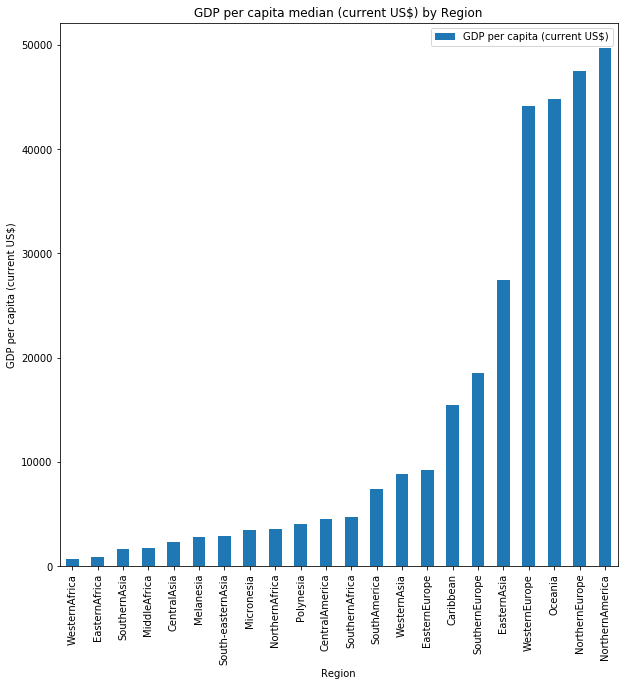

<Figure size 432x288 with 0 Axes>

In [409]:

country_region_gdp_df

country_region_gdp_df.loc[:,'GDP per capita (current US$)'] = pd.to_numeric(country_region_gdp_df.loc[:,'GDP per capita (current US$)'], downcast='float')

country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['GDP per capita (current US$)'] != -99]

country_region_gdp_df

country_region_gdp_df = country_region_gdp_df.drop([117])

country_region_gdp_df = country_region_gdp_df.drop([133])

country_region_gdp_df = country_region_gdp_df.sort_values("GDP per capita (current US$)")

country_region_gdp_df

region_gdp = country_region_gdp_df.groupby('Region').median()
region_gdp = region_gdp.sort_values("GDP per capita (current US$)")


plot = region_gdp.plot(kind="bar", figsize=(10,10))


plt.title("GDP per capita median (current US$) by Region")
plot.set_xlabel("Region")
plot.set_ylabel("GDP per capita (current US$)")


plt.savefig("/Users/marlonschieber/Desktop/gdpcapita.png", bbox_inches='tight')

plt.show()
plt.tight_layout()



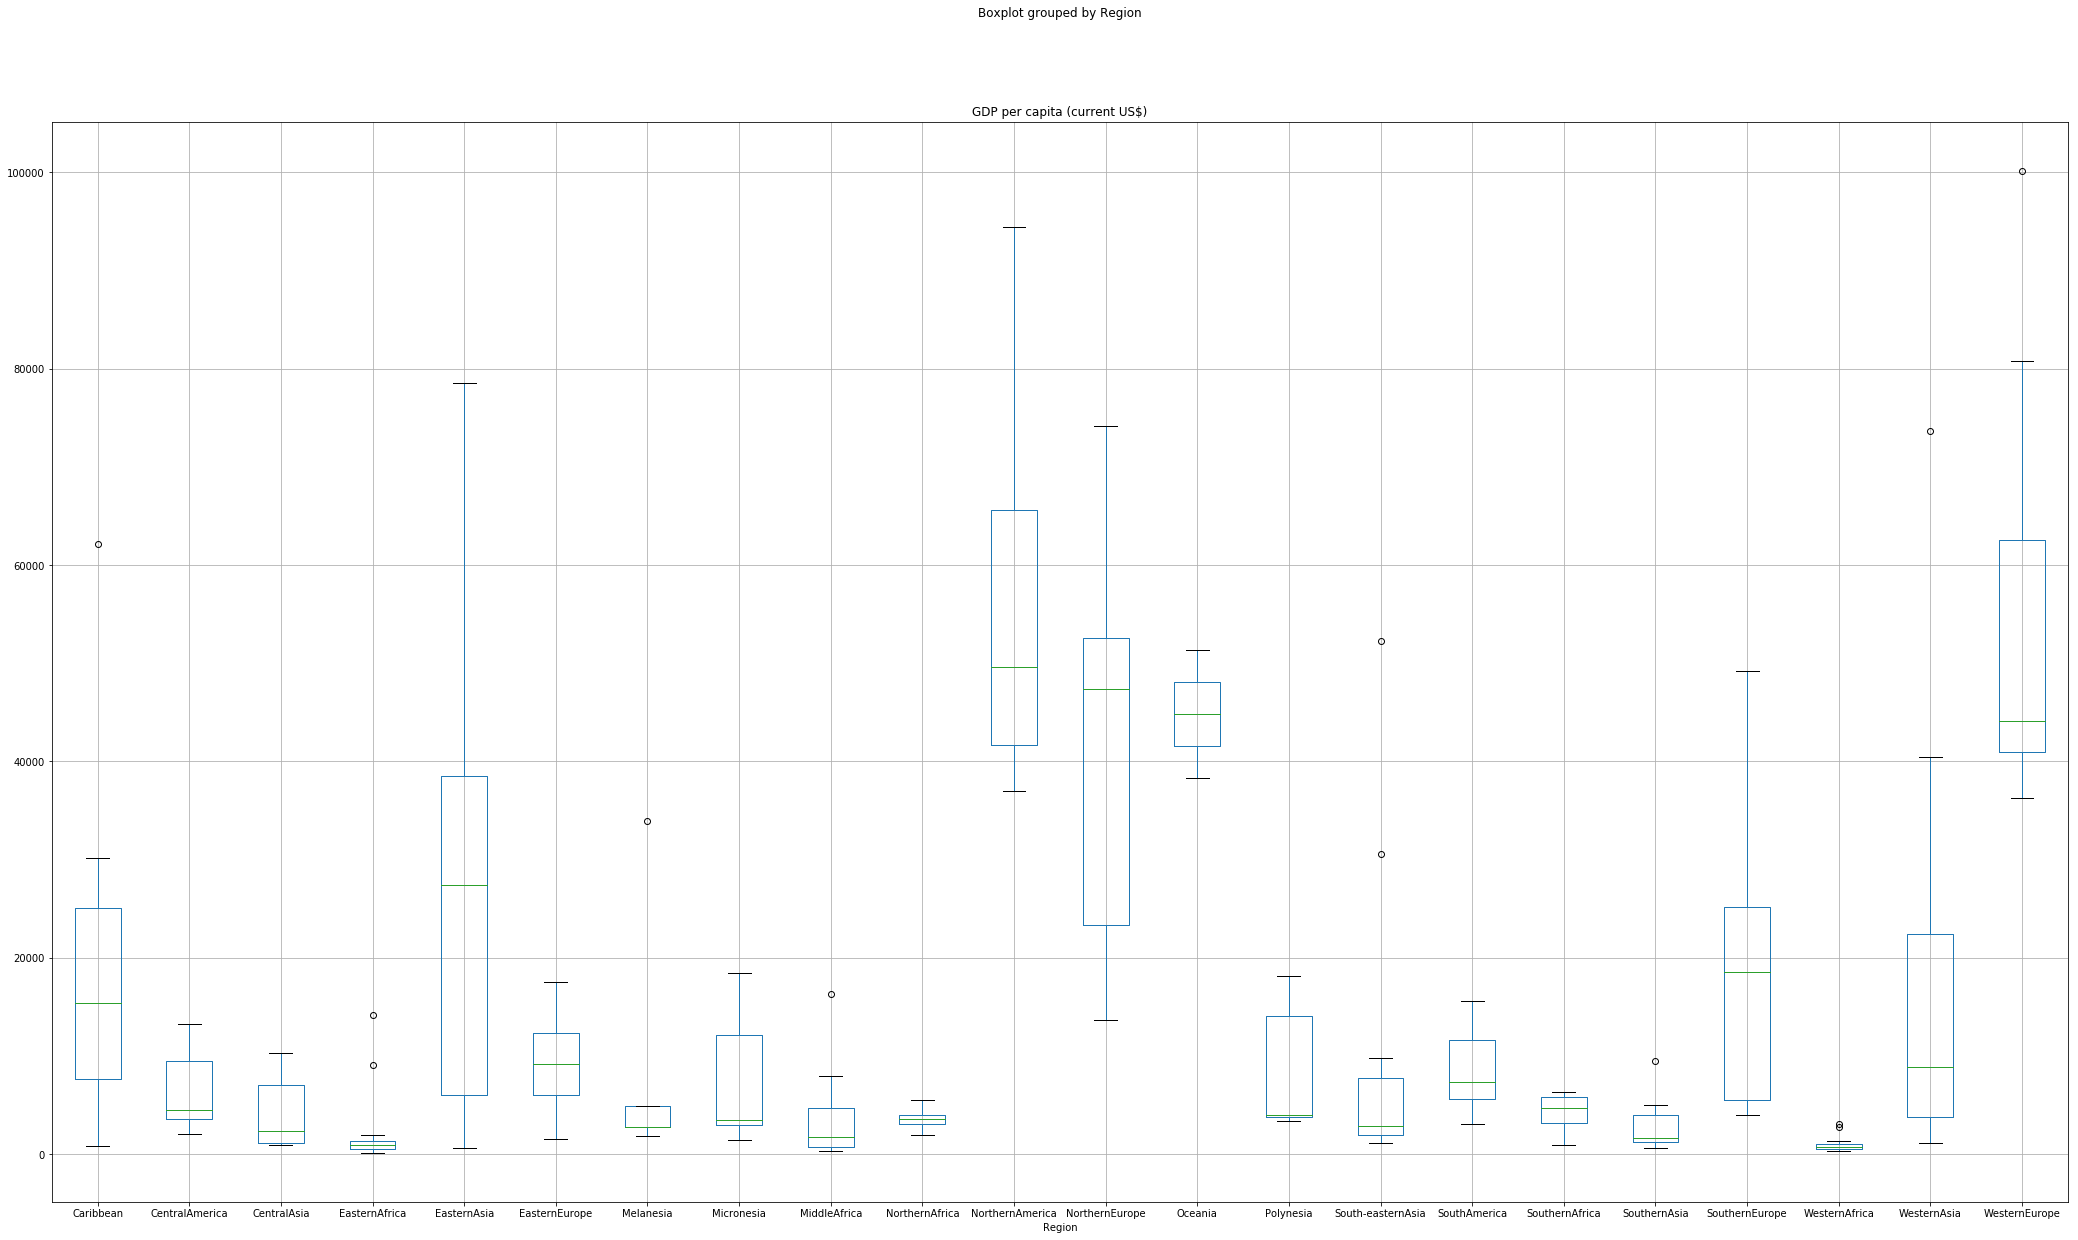

In [410]:

country_region_gdp_df

country_region_gdp_df.boxplot("GDP per capita (current US$)", by="Region", figsize=(35, 20))

plt.savefig("/Users/marlonschieber/Desktop/bocplot.png", bbox_inches='tight')


In [411]:
group1 = country_region_gdp_df[country_region_gdp_df["Region"] == 'NorthernAmerica']["GDP per capita (current US$)"]
group2 = country_region_gdp_df[country_region_gdp_df["Region"] == 'NorthernEurope']["GDP per capita (current US$)"]
group3 = country_region_gdp_df[country_region_gdp_df["Region"] == 'WesternEurope']["GDP per capita (current US$)"]
group4 = country_region_gdp_df[country_region_gdp_df["Region"] == 'Oceania']["GDP per capita (current US$)"]

stats.f_oneway(group1, group2, group3, group4)



F_onewayResult(statistic=0.7233066057978529, pvalue=0.5504709297578676)

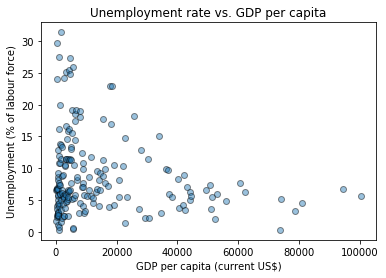

In [412]:
country_data


country_region_gdp_df = country_data.loc[:, ['country', 'Region', 'Unemployment (% of labour force)', "GDP per capita (current US$)"]]
country_region_gdp_df

country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Unemployment (% of labour force)'] != '...']


country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['GDP per capita (current US$)'] != -99]


country_region_gdp_df.loc[:,'Unemployment (% of labour force)'] = pd.to_numeric(country_region_gdp_df.loc[:,'Unemployment (% of labour force)'], downcast='integer')

country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Unemployment (% of labour force)'] != -99]

country_region_gdp_df
country_region_gdp_df = country_region_gdp_df.sort_values(['GDP per capita (current US$)'])

country_region_gdp_df = country_region_gdp_df.drop([117])

gdp = country_region_gdp_df['GDP per capita (current US$)']
unemployment = country_region_gdp_df['Unemployment (% of labour force)']


plt.scatter(x=gdp, y=unemployment, edgecolors='black', marker='o', alpha=0.45)

plt.title("Unemployment rate vs. GDP per capita")
plt.xlabel("GDP per capita (current US$)")
plt.ylabel("Unemployment (% of labour force)")


plt.savefig("/Users/marlonschieber/Desktop/gdp_cap_unem.png", bbox_inches='tight')

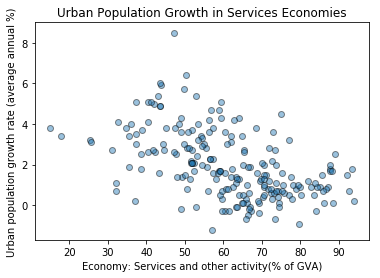

In [413]:
country_region_gdp_df = country_data.loc[:, ['country', 'Region', 'Urban population growth rate (average annual %)', "Economy: Services and other activity (% of GVA)"]]
country_region_gdp_df


country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Urban population growth rate (average annual %)'] != '-~0.0']
country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Urban population growth rate (average annual %)'] != '~0.0']


country_region_gdp_df.loc[:,'Urban population growth rate (average annual %)'] = pd.to_numeric(country_region_gdp_df.loc[:,'Urban population growth rate (average annual %)'], downcast='float')


country_region_gdp_df.loc[:,'Economy: Services and other activity (% of GVA)'] = pd.to_numeric(country_region_gdp_df.loc[:,'Economy: Services and other activity (% of GVA)'], downcast='integer')

country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Economy: Services and other activity (% of GVA)'] != -99]


country_region_gdp_df

country_region_gdp_df = country_region_gdp_df.sort_values(['country'])

pop = country_region_gdp_df['Urban population growth rate (average annual %)']
ag = country_region_gdp_df['Economy: Services and other activity (% of GVA)']



plt.scatter(x=ag, y=pop, edgecolors='black', marker='o', alpha=0.45)

plt.title("Urban Population Growth in Services Economies")
plt.xlabel("Economy: Services and other activity(% of GVA)")
plt.ylabel("Urban population growth rate (average annual %)")

plt.savefig("/Users/marlonschieber/Desktop/urbpopserv.png", bbox_inches='tight')




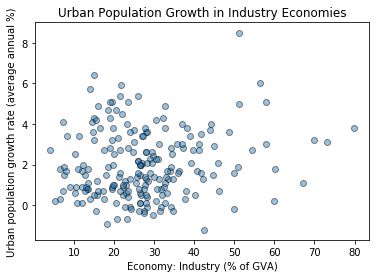

In [414]:
country_region_gdp_df = country_data.loc[:, ['country', 'Region', 'Urban population growth rate (average annual %)', "Economy: Industry (% of GVA)"]]
country_region_gdp_df


country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Urban population growth rate (average annual %)'] != '-~0.0']
country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Urban population growth rate (average annual %)'] != '~0.0']


country_region_gdp_df.loc[:,'Urban population growth rate (average annual %)'] = pd.to_numeric(country_region_gdp_df.loc[:,'Urban population growth rate (average annual %)'], downcast='float')


country_region_gdp_df.loc[:,'Economy: Industry (% of GVA)'] = pd.to_numeric(country_region_gdp_df.loc[:,'Economy: Industry (% of GVA)'], downcast='integer')

country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Economy: Industry (% of GVA)'] != -99]


country_region_gdp_df = country_region_gdp_df.sort_values(['country'])

pop = country_region_gdp_df['Urban population growth rate (average annual %)']
ag = country_region_gdp_df['Economy: Industry (% of GVA)']


plt.scatter(x=ag, y=pop, edgecolors='black', marker='o', alpha=0.45)

plt.title("Urban Population Growth in Industry Economies")
plt.xlabel("Economy: Industry (% of GVA)")
plt.ylabel("Urban population growth rate (average annual %)")

plt.savefig("/Users/marlonschieber/Desktop/urbpopind.png", bbox_inches='tight')

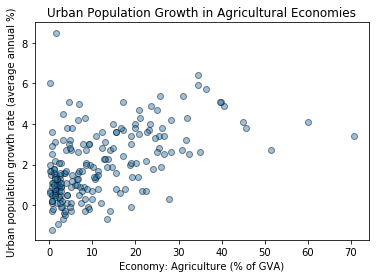

In [415]:
country_region_gdp_df = country_data.loc[:, ['country', 'Region', 'Urban population growth rate (average annual %)', "Economy: Agriculture (% of GVA)"]]
country_region_gdp_df


country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Urban population growth rate (average annual %)'] != '-~0.0']
country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Urban population growth rate (average annual %)'] != '~0.0']


country_region_gdp_df.loc[:,'Urban population growth rate (average annual %)'] = pd.to_numeric(country_region_gdp_df.loc[:,'Urban population growth rate (average annual %)'], downcast='float')

country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Economy: Agriculture (% of GVA)'] != '~0.0']

country_region_gdp_df.loc[:,'Economy: Agriculture (% of GVA)'] = pd.to_numeric(country_region_gdp_df.loc[:,'Economy: Agriculture (% of GVA)'], downcast='integer')

country_region_gdp_df = country_region_gdp_df[country_region_gdp_df['Economy: Agriculture (% of GVA)'] != -99]


country_region_gdp_df = country_region_gdp_df.sort_values(['country'])

pop = country_region_gdp_df['Urban population growth rate (average annual %)']
ag = country_region_gdp_df['Economy: Agriculture (% of GVA)']


plt.scatter(x=ag, y=pop, edgecolors='black', marker='o', alpha=0.45)

plt.title("Urban Population Growth in Agricultural Economies")
plt.xlabel("Economy: Agriculture (% of GVA)")
plt.ylabel("Urban population growth rate (average annual %)")

plt.savefig("/Users/marlonschieber/Desktop/urbpopag.png", bbox_inches='tight')